# Telsa & GameStop Historical Data

In [ ]:
#install the necessary libs
!pip install yfinance 
!pip install bs4
!pip install nbformat
!pip install pandas

In [35]:
import yfinance as yf #for ticker data
import pandas as pd 
import requests #for web request
from bs4 import BeautifulSoup #for web scraping
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [38]:
tsla = yf.Ticker('TSLA')
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


###  Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [41]:
tesla_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
#make a request for the website data
tesla_html = requests.get(tesla_url).text
#make a soup object
tesla_soup = BeautifulSoup(tesla_html,"html.parser")

''' Since we want the quarterly revenue we will use the second table on the page'''

#option 1: use pd.read_html
#tesla_revenue = pd.read_html(tesla_url)

#option 2: parse the soup object
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])
for row in tesla_soup.find_all("tbody")[1].find_all("tr"):
    #get the data from each row
    cols = row.find_all("td")
    date = cols[0].text
    revenue = cols[1].text

    #Concatenate the data to the df
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

#print the tail
tesla_revenue.tail()

    

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


#### Clean the Tesla Data

In [70]:
#Remove the dollar signs and the commas from the revenue using regular expression
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"",regex=True)
#remove null values
tesla_revenue.dropna(inplace=True)
#remove empty values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].str.strip() != ""]

#display the tail again
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [73]:
gme = yf.Ticker('GME')
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [76]:
gme_url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
#make a request for the website data
gme_html = requests.get(gme_url).text
#make a soup object
gme_soup = BeautifulSoup(gme_html,"html.parser")

''' Since we want the quarterly revenue we will use the second table on the page'''

#option 1: use pd.read_html
#tesla_revenue = pd.read_html(tesla_url)

#option 2: parse the soup object
gme_revenue = pd.DataFrame(columns=["Date","Revenue"])
for row in gme_soup.find_all("tbody")[1].find_all("tr"):
    #get the data from each row
    cols = row.find_all("td")
    date = cols[0].text
    revenue = cols[1].text

    #Concatenate the data to the df
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

#print the tail
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


#### Clean the GameStop Data

In [79]:
#Remove the dollar signs and the commas from the revenue using regular expression
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$',"",regex=True)
#remove null values
gme_revenue.dropna(inplace=True)
#remove empty values
gme_revenue = gme_revenue[gme_revenue['Revenue'].str.strip() != ""]

#display the tail again
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#### Declare make_graph function

Declare the make_graph function developed by IBM and commented by Josh Josey

In [82]:
#function to make a graph with stock data, revenue data, and the stock title
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

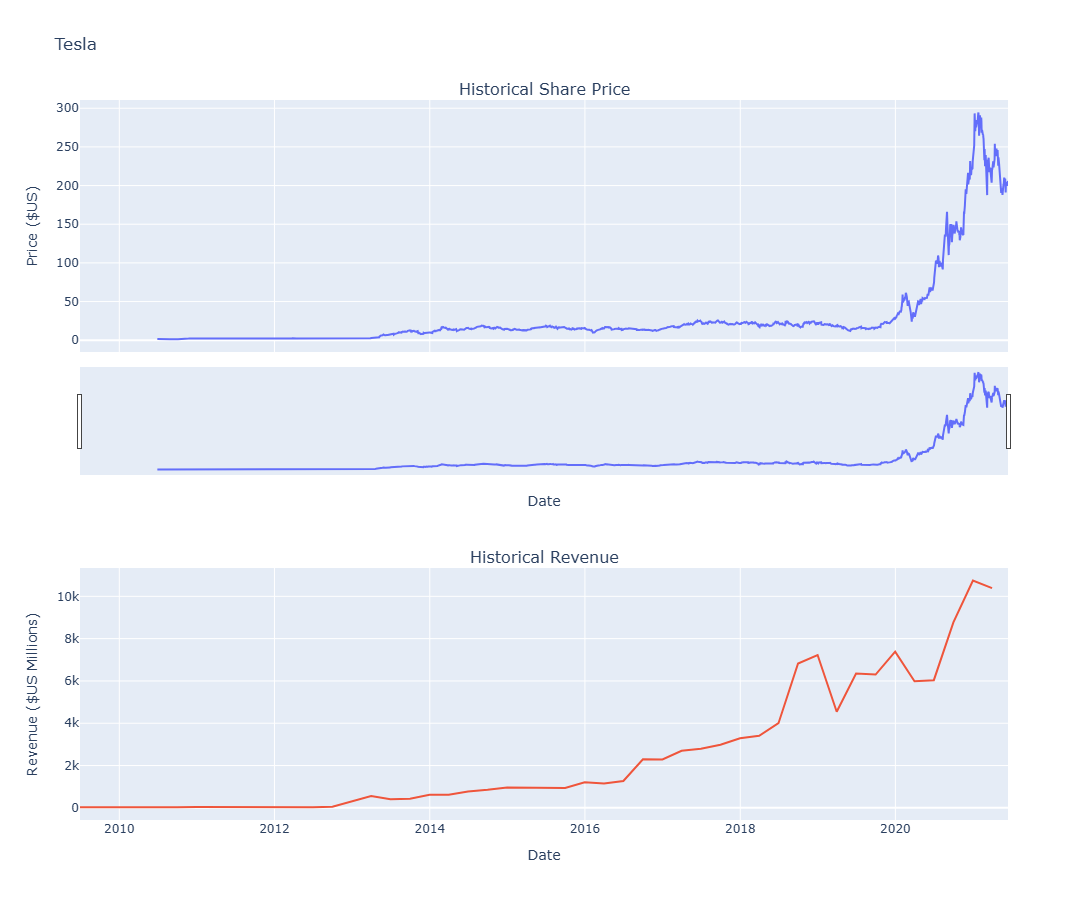

In [85]:
make_graph(tesla_data,tesla_revenue,"Tesla")

### Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.

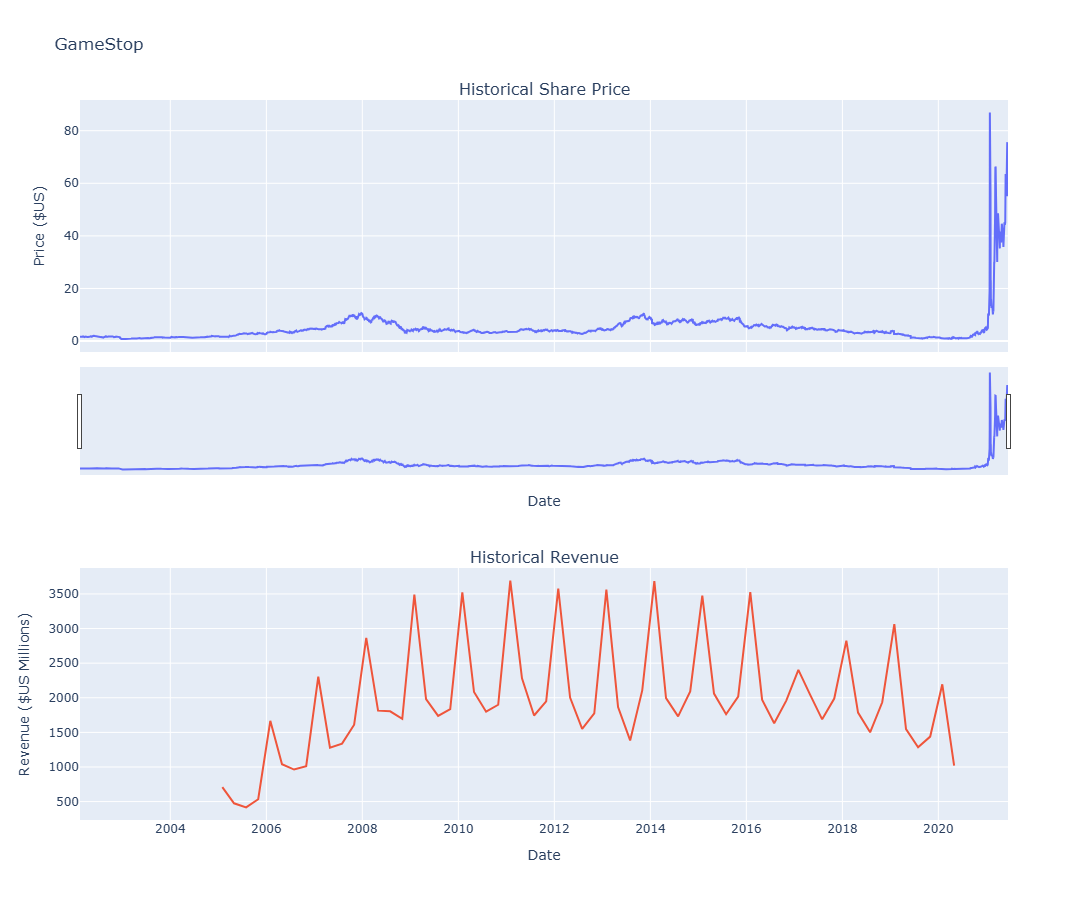

In [88]:
make_graph(gme_data, gme_revenue, 'GameStop')